In [ ]:
%%bash
pip install xarray

In [ ]:
import xarray as xr
import os

In [ ]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.2 MB/s eta 0:00:00


In [ ]:
from netCDF4 import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/raw_data_netcdf_format.nc'
data = Dataset(file_path)


In [ ]:
!pip install netcdf2csv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.9/870.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.20.1 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.4.1 which is incompatible.
google-colab 1.0.0 requires

In [ ]:
from netcdf2csv import convert_file

In [ ]:
convert_file(file_path,'/content/drive/MyDrive','/content/drive/MyDrive',clean_choice=0)

raw_data_netcdf_format.nc has been processed to csv and saved to :-/content/drive/MyDrive/uncleaned_raw_data_netcdf_format.csv
Progress: |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% Complete


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/raw_data_csv_format.csv")
print(df)

        longitude  latitude                 time      u100      v100  \
0       77.580002     31.23  2015-01-01 00:00:00 -3.020086 -1.269500   
1       77.580002     31.23  2015-01-01 06:00:00 -1.918814 -0.621730   
2       77.580002     31.23  2015-01-01 12:00:00 -0.305076 -1.223846   
3       77.580002     31.23  2015-01-01 18:00:00 -1.629524 -0.837866   
4       77.580002     31.23  2015-01-02 00:00:00 -1.649614 -1.717096   
...           ...       ...                  ...       ...       ...   
518667  80.830002     28.73  2021-12-30 18:00:00  1.564713 -1.201498   
518668  80.830002     28.73  2021-12-31 00:00:00  0.231498 -1.300148   
518669  80.830002     28.73  2021-12-31 06:00:00  0.472207  0.616663   
518670  80.830002     28.73  2021-12-31 12:00:00  1.619137  1.373619   
518671  80.830002     28.73  2021-12-31 18:00:00  0.111691 -0.251712   

            u10n      v10n      fg10        d2m        t2m  ...       lcc  \
0      -0.703863 -0.323678  9.254387  259.01220  270.72714

In [ ]:
print(f"This dataset has a total of {len(df.columns)} features and they are as follow {list(df.columns)}")

This dataset has a total of 36 features and they are as follow ['longitude', 'latitude', 'time', 'u100', 'v100', 'u10n', 'v10n', 'fg10', 'd2m', 't2m', 'anor', 'isor', 'bld', 'blh', 'cbh', 'cin', 'csf', 'csfr', 'lgws', 'ewss', 'zust', 'z', 'gwd', 'hcc', 'lsf', 'lssfr', 'lcc', 'msl', 'mser', 'msr', 'mcc', 'ptype', 'sp', 'tcsw', 'tcslw', 'deg0l']


In [ ]:
df.rename(columns = {'u100':'100m u componenet of wind', 'v100':'100m v-component of wind',
                              'u10n':'10m u-componenet of wind','v10n':'10m v-componenet of wind','fg10':'10m wind gust','d2m':'2m dewpoint temperature','t2m':'2m temperature','anor':'Angle of sub-gridscale orography','isor':'Anisotropy of sub-gridscale orography'}, inplace = True)

In [ ]:
df.rename(columns = {'bld':'Boundary layer dissipation', 'blh':'Boundary layer height','cbh':'Cloud base height','cin':'Convective inhibition','csf':'Convective snowfall','csfr':'Convective snowfall rate water equivalent','lgws':' Eastward gravity wave surface stress','ewss':'Eastward turbulent surface stress','zust':'Friction velocity','z':'Geopotential','gwd':'Gravity wave dissipation','hcc':'High cloud cover','lsf':'Large scale snowfall rate water equivalent','lssfr':'Large-scale snowfall','lcc':'Low cloud cover','msl':'Mean sea level pressure'}, inplace = True)

In [ ]:
df.rename(columns = {'mser':'Mean snow evaporation rate', 'msr':'Mean snowfall rate','cbh':'Cloud base height','mcc':'Medium cloud cover','ptype':'Precipitation type','sp':'Surface pressure','tcsw':' Total column snow water','tcslw':'Total column supercooled liquid water','deg0l':'Zero degree level'}, inplace = True)

In [ ]:
df.head()

,longitude,latitude,time,100m u componenet of wind,100m v-component of wind,10m u-componenet of wind,10m v-componenet of wind,10m wind gust,2m dewpoint temperature,2m temperature,...,Low cloud cover,Mean sea level pressure,Mean snow evaporation rate,Mean snowfall rate,Medium cloud cover,Precipitation type,Surface pressure,Total column snow water,Total column supercooled liquid water,Zero degree level
0,77.580002,31.23,2015-01-01 00:00:00,-3.020086,-1.269500,-0.703863,-0.323678,9.254387,259.01220,270.72714,...,0.005005,102020.83,-2.238321e-07,0.0,-2.980232e-08,0.0,78958.914,0.000000,0.000626,1056.2698
1,77.580002,31.23,2015-01-01 06:00:00,-1.918814,-0.621730,-1.707320,-0.531937,8.013790,261.87717,281.13336,...,0.000000,102237.46,-5.146136e-06,0.0,-2.980232e-08,0.0,79215.484,0.000000,0.000144,1164.4120
2,77.580002,31.23,2015-01-01 12:00:00,-0.305076,-1.223846,-0.056676,-0.153762,4.681635,262.47580,282.61460,...,0.000000,101912.79,-5.310631e-08,0.0,9.247303e-03,0.0,78978.990,0.000150,0.000000,1165.0331
3,77.580002,31.23,2015-01-01 18:00:00,-1.629524,-0.837866,-0.376865,-0.203005,4.830484,262.31497,275.22678,...,0.000000,102136.98,-3.217610e-08,0.0,8.948228e-02,0.0,79103.930,0.000299,0.000000,1340.7157
4,77.580002,31.23,2015-01-02 00:00:00,-1.649614,-1.717096,-0.450389,-0.263925,5.102464,257.88873,273.75418,...,0.000000,101974.60,-2.109573e-08,0.0,3.312249e-01,0.0,78943.300,0.001199,0.021375,1295.4559


In [ ]:
df['time'] = pd.to_datetime(df['time'])
df.head()

,longitude,latitude,time,100m u componenet of wind,100m v-component of wind,10m u-componenet of wind,10m v-componenet of wind,10m wind gust,2m dewpoint temperature,2m temperature,...,Low cloud cover,Mean sea level pressure,Mean snow evaporation rate,Mean snowfall rate,Medium cloud cover,Precipitation type,Surface pressure,Total column snow water,Total column supercooled liquid water,Zero degree level
0,77.580002,31.23,2015-01-01 00:00:00,-3.020086,-1.269500,-0.703863,-0.323678,9.254387,259.01220,270.72714,...,0.005005,102020.83,-2.238321e-07,0.0,-2.980232e-08,0.0,78958.914,0.000000,0.000626,1056.2698
1,77.580002,31.23,2015-01-01 06:00:00,-1.918814,-0.621730,-1.707320,-0.531937,8.013790,261.87717,281.13336,...,0.000000,102237.46,-5.146136e-06,0.0,-2.980232e-08,0.0,79215.484,0.000000,0.000144,1164.4120
2,77.580002,31.23,2015-01-01 12:00:00,-0.305076,-1.223846,-0.056676,-0.153762,4.681635,262.47580,282.61460,...,0.000000,101912.79,-5.310631e-08,0.0,9.247303e-03,0.0,78978.990,0.000150,0.000000,1165.0331
3,77.580002,31.23,2015-01-01 18:00:00,-1.629524,-0.837866,-0.376865,-0.203005,4.830484,262.31497,275.22678,...,0.000000,102136.98,-3.217610e-08,0.0,8.948228e-02,0.0,79103.930,0.000299,0.000000,1340.7157
4,77.580002,31.23,2015-01-02 00:00:00,-1.649614,-1.717096,-0.450389,-0.263925,5.102464,257.88873,273.75418,...,0.000000,101974.60,-2.109573e-08,0.0,3.312249e-01,0.0,78943.300,0.001199,0.021375,1295.4559


In [ ]:
df['time']=df['time'].dt.time

In [ ]:
df.head()

,longitude,latitude,time,100m u componenet of wind,100m v-component of wind,10m u-componenet of wind,10m v-componenet of wind,10m wind gust,2m dewpoint temperature,2m temperature,...,Low cloud cover,Mean sea level pressure,Mean snow evaporation rate,Mean snowfall rate,Medium cloud cover,Precipitation type,Surface pressure,Total column snow water,Total column supercooled liquid water,Zero degree level
0,77.580002,31.23,00:00:00,-3.020086,-1.269500,-0.703863,-0.323678,9.254387,259.01220,270.72714,...,0.005005,102020.83,-2.238321e-07,0.0,-2.980232e-08,0.0,78958.914,0.000000,0.000626,1056.2698
1,77.580002,31.23,06:00:00,-1.918814,-0.621730,-1.707320,-0.531937,8.013790,261.87717,281.13336,...,0.000000,102237.46,-5.146136e-06,0.0,-2.980232e-08,0.0,79215.484,0.000000,0.000144,1164.4120
2,77.580002,31.23,12:00:00,-0.305076,-1.223846,-0.056676,-0.153762,4.681635,262.47580,282.61460,...,0.000000,101912.79,-5.310631e-08,0.0,9.247303e-03,0.0,78978.990,0.000150,0.000000,1165.0331
3,77.580002,31.23,18:00:00,-1.629524,-0.837866,-0.376865,-0.203005,4.830484,262.31497,275.22678,...,0.000000,102136.98,-3.217610e-08,0.0,8.948228e-02,0.0,79103.930,0.000299,0.000000,1340.7157
4,77.580002,31.23,00:00:00,-1.649614,-1.717096,-0.450389,-0.263925,5.102464,257.88873,273.75418,...,0.000000,101974.60,-2.109573e-08,0.0,3.312249e-01,0.0,78943.300,0.001199,0.021375,1295.4559


<ipython-input-16-95301f215156>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
<ipython-input-16-95301f215156>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)


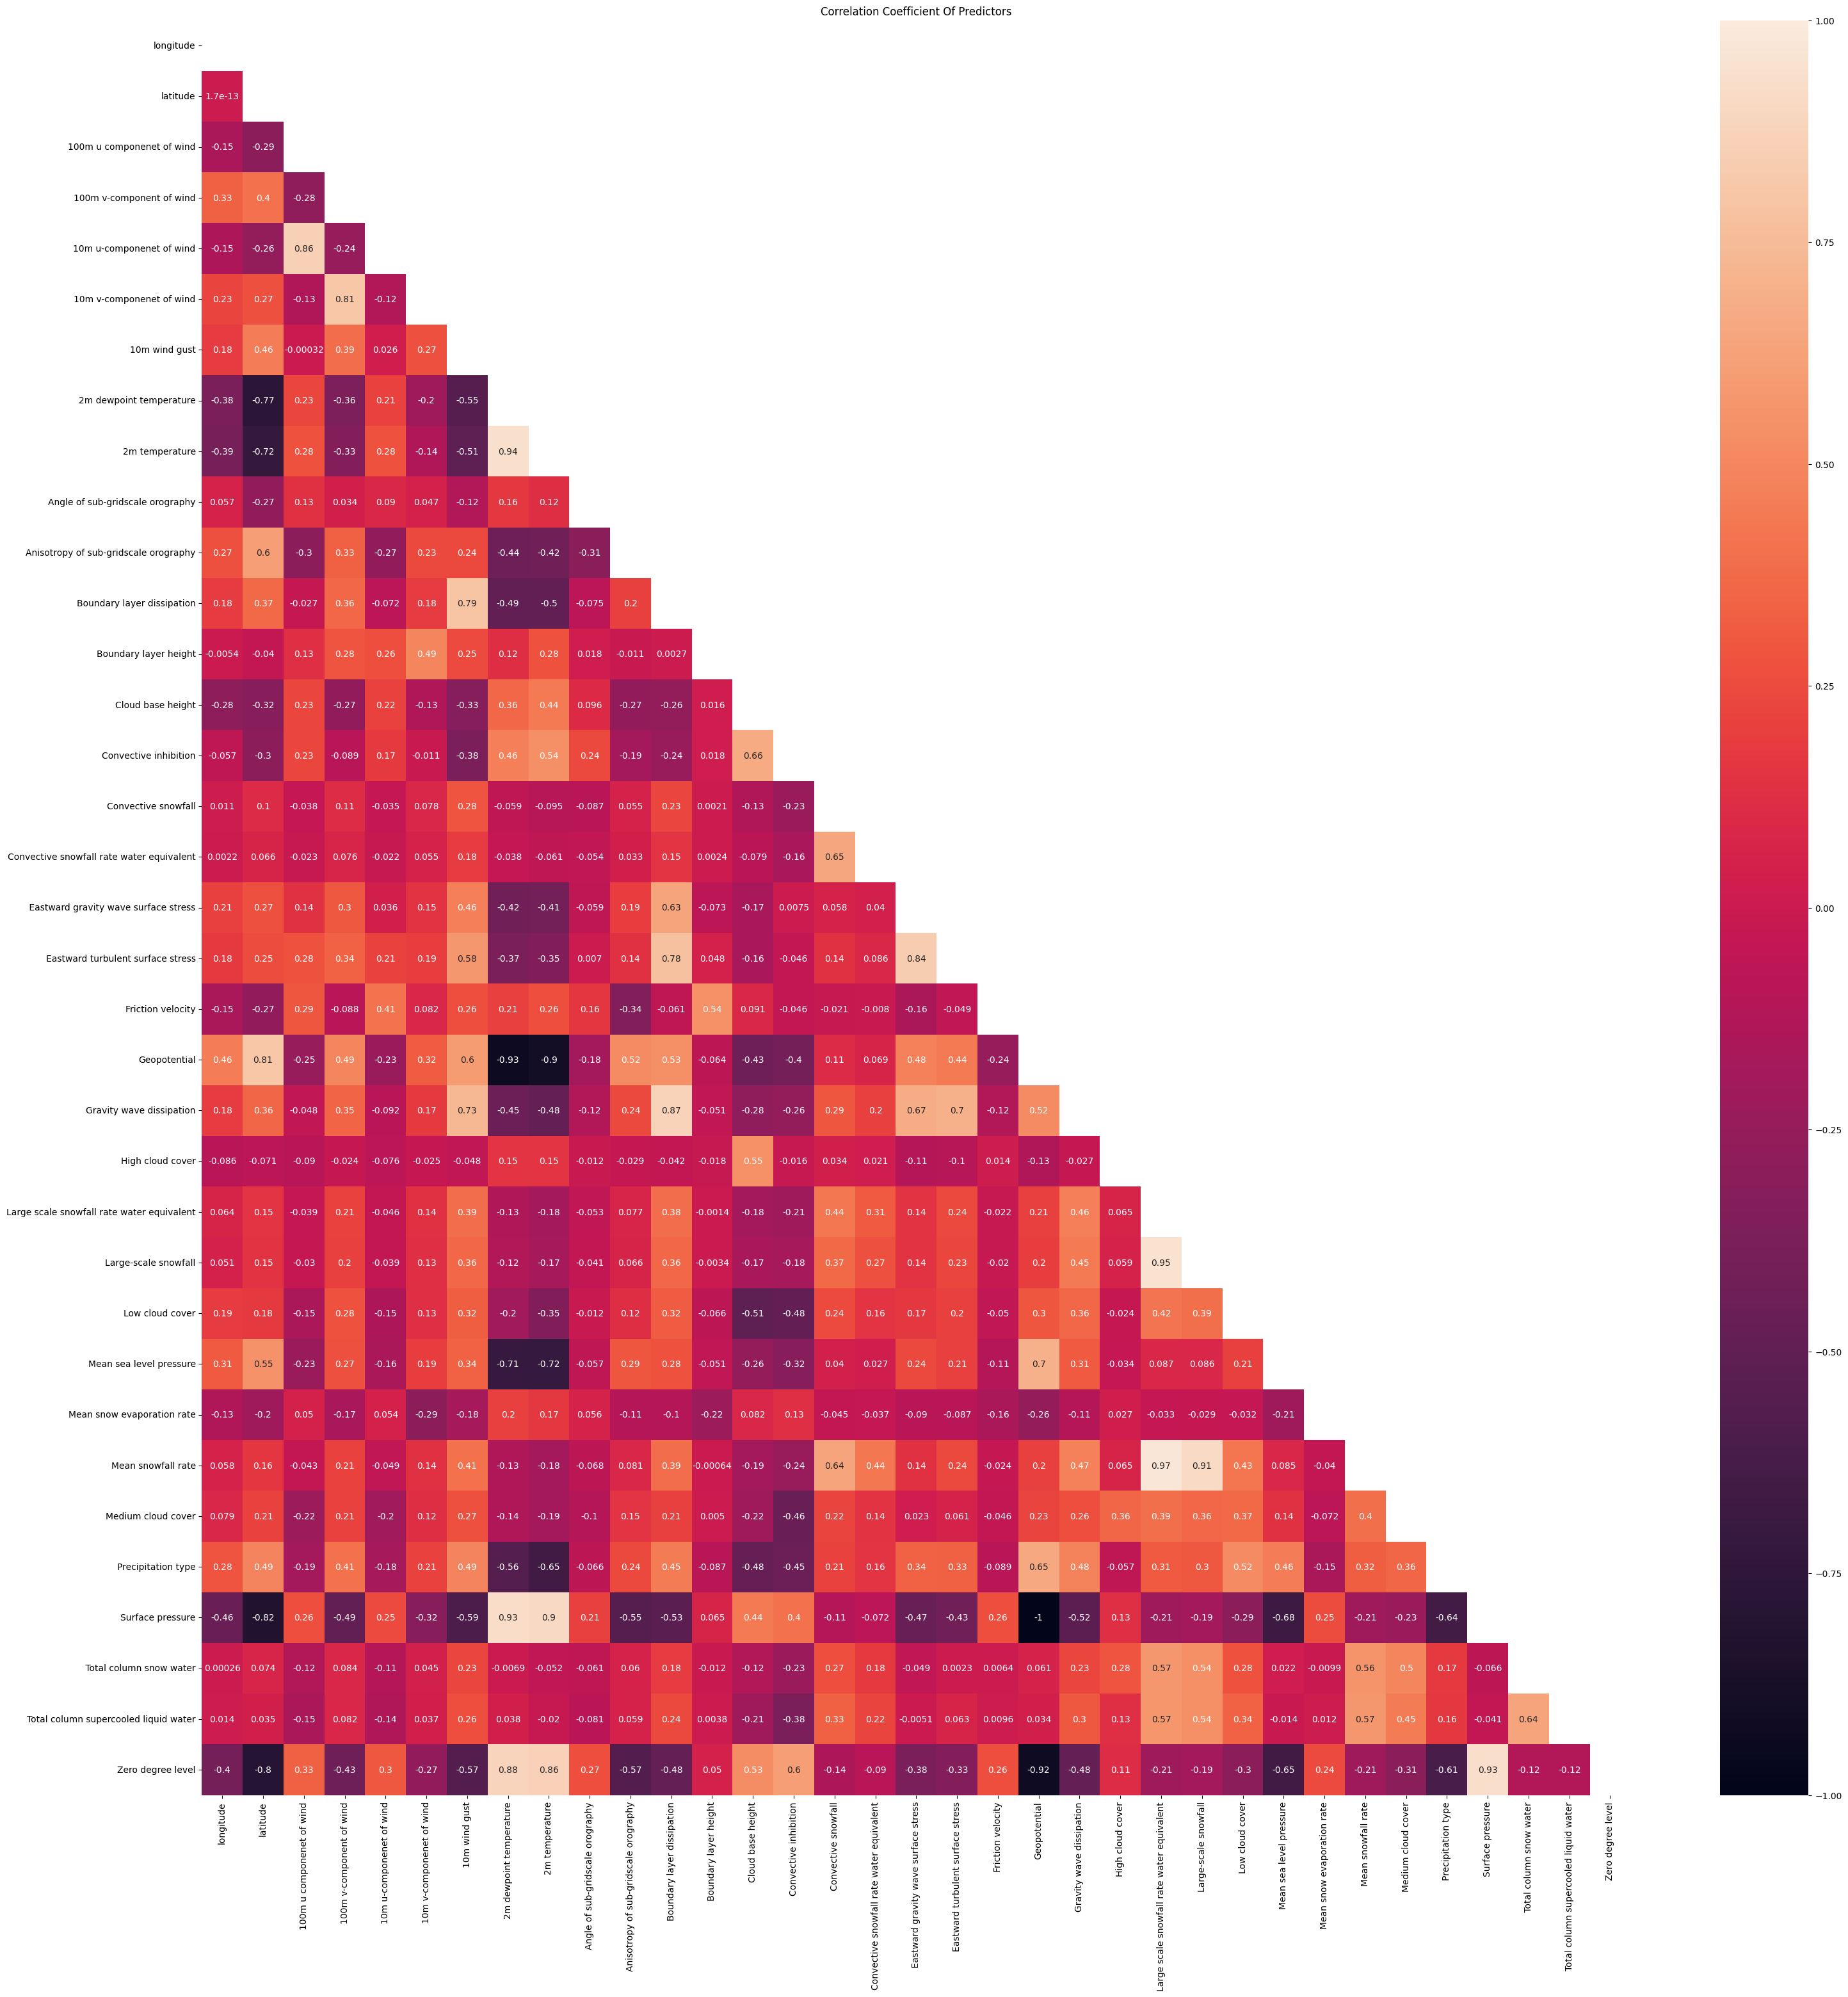

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size
plt.figure(figsize=(36,36))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [ ]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif
# features to consider removing
considered_features = ['100m u componenet of wind','100m v-component of wind','10m u-componenet of wind','10m v-componenet of wind','2m dewpoint temperature','2m temperature','Surface pressure','Zero degree level','Geopotential','latitude','Boundary layer dissipation',' Eastward gravity wave surface stress','Eastward turbulent surface stress','Gravity wave dissipation','Large scale snowfall rate water equivalent','Large-scale snowfall']


# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-17-77ed6dad555a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
6,Surface pressure,428.990843
8,Geopotential,421.911933
4,2m dewpoint temperature,16.165987
5,2m temperature,12.315987
14,Large scale snowfall rate water equivalent,10.675400
15,Large-scale snowfall,10.229032
7,Zero degree level,9.543880
12,Eastward turbulent surface stress,8.563538
10,Boundary layer dissipation,7.607877
13,Gravity wave dissipation,6.056599


In [ ]:
# compute vif values after removing a feature
considered_features.remove('Surface pressure')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-17-77ed6dad555a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
7,Geopotential,17.283962
4,2m dewpoint temperature,15.995455
5,2m temperature,11.901988
13,Large scale snowfall rate water equivalent,10.664437
14,Large-scale snowfall,10.219325
11,Eastward turbulent surface stress,8.410818
6,Zero degree level,8.095755
9,Boundary layer dissipation,7.580474
12,Gravity wave dissipation,6.054778
10,Eastward gravity wave surface stress,5.063898


LOGISTIC REGRESSION

In [ ]:
# compute vif values after removing a feature
considered_features.remove('2m dewpoint temperature')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-17-77ed6dad555a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
6,Geopotential,14.949172
12,Large scale snowfall rate water equivalent,10.597687
13,Large-scale snowfall,10.214036
10,Eastward turbulent surface stress,8.265266
5,Zero degree level,8.061319
8,Boundary layer dissipation,7.283375
4,2m temperature,7.078770
11,Gravity wave dissipation,5.853377
9,Eastward gravity wave surface stress,4.966978
0,100m u componenet of wind,4.591774


In [ ]:
# compute vif values after removing a feature
considered_features.remove('Large scale snowfall rate water equivalent')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-17-77ed6dad555a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
6,Geopotential,14.945260
10,Eastward turbulent surface stress,8.245696
5,Zero degree level,8.036665
8,Boundary layer dissipation,7.280181
4,2m temperature,7.078207
11,Gravity wave dissipation,5.772839
9,Eastward gravity wave surface stress,4.905443
0,100m u componenet of wind,4.591564
1,100m v-component of wind,4.221027
2,10m u-componenet of wind,4.101106


In [ ]:
# compute vif values after removing a feature
considered_features.remove('Eastward turbulent surface stress')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-17-77ed6dad555a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
6,Geopotential,14.767508
5,Zero degree level,8.002679
4,2m temperature,6.941134
10,Gravity wave dissipation,5.474516
8,Boundary layer dissipation,4.541332
0,100m u componenet of wind,4.489053
1,100m v-component of wind,4.060811
2,10m u-componenet of wind,3.967936
7,latitude,3.294880
3,10m v-componenet of wind,3.293547


In [ ]:
# compute vif values after removing a feature
considered_features.remove('Zero degree level')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-17-77ed6dad555a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
5,Geopotential,10.781265
4,2m temperature,6.837473
9,Gravity wave dissipation,5.433996
7,Boundary layer dissipation,4.537219
0,100m u componenet of wind,4.412404
1,100m v-component of wind,4.039979
2,10m u-componenet of wind,3.966791
3,10m v-componenet of wind,3.290734
6,latitude,3.148064
8,Eastward gravity wave surface stress,2.370567


In [ ]:
# compute vif values after removing a feature
considered_features.remove('Gravity wave dissipation')
compute_vif(considered_features).sort_values('VIF', ascending=False)

<ipython-input-17-77ed6dad555a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
5,Geopotential,10.773856
4,2m temperature,6.837415
0,100m u componenet of wind,4.390950
1,100m v-component of wind,4.039267
2,10m u-componenet of wind,3.966505
3,10m v-componenet of wind,3.290299
6,latitude,3.146902
7,Boundary layer dissipation,2.175833
8,Eastward gravity wave surface stress,2.081910
9,Large-scale snowfall,1.183112


In [ ]:
feature_cleaned_df=df.drop(['Surface pressure','2m dewpoint temperature','Large scale snowfall rate water equivalent','Eastward turbulent surface stress','Zero degree level','Gravity wave dissipation'],axis=1)
feature_cleaned_df.head()

,longitude,latitude,time,100m u componenet of wind,100m v-component of wind,10m u-componenet of wind,10m v-componenet of wind,10m wind gust,2m temperature,Angle of sub-gridscale orography,...,High cloud cover,Large-scale snowfall,Low cloud cover,Mean sea level pressure,Mean snow evaporation rate,Mean snowfall rate,Medium cloud cover,Precipitation type,Total column snow water,Total column supercooled liquid water
0,77.580002,31.23,00:00:00,-3.020086,-1.269500,-0.703863,-0.323678,9.254387,270.72714,-0.843755,...,-2.980232e-08,0.0,0.005005,102020.83,-2.238321e-07,0.0,-2.980232e-08,0.0,0.000000,0.000626
1,77.580002,31.23,06:00:00,-1.918814,-0.621730,-1.707320,-0.531937,8.013790,281.13336,-0.843755,...,-2.980232e-08,0.0,0.000000,102237.46,-5.146136e-06,0.0,-2.980232e-08,0.0,0.000000,0.000144
2,77.580002,31.23,12:00:00,-0.305076,-1.223846,-0.056676,-0.153762,4.681635,282.61460,-0.843755,...,1.637050e-01,0.0,0.000000,101912.79,-5.310631e-08,0.0,9.247303e-03,0.0,0.000150,0.000000
3,77.580002,31.23,18:00:00,-1.629524,-0.837866,-0.376865,-0.203005,4.830484,275.22678,-0.843755,...,7.294059e-03,0.0,0.000000,102136.98,-3.217610e-08,0.0,8.948228e-02,0.0,0.000299,0.000000
4,77.580002,31.23,00:00:00,-1.649614,-1.717096,-0.450389,-0.263925,5.102464,273.75418,-0.843755,...,1.081902e-02,0.0,0.000000,101974.60,-2.109573e-08,0.0,3.312249e-01,0.0,0.001199,0.021375


In [ ]:
feature_cleaned_df=feature_cleaned_df.dropna()
feature_cleaned_df

,longitude,latitude,time,100m u componenet of wind,100m v-component of wind,10m u-componenet of wind,10m v-componenet of wind,10m wind gust,2m temperature,Angle of sub-gridscale orography,...,High cloud cover,Large-scale snowfall,Low cloud cover,Mean sea level pressure,Mean snow evaporation rate,Mean snowfall rate,Medium cloud cover,Precipitation type,Total column snow water,Total column supercooled liquid water
10,77.580002,31.23,12:00:00,-0.550533,1.318068,-0.111365,0.191325,6.702051,277.96854,-0.843755,...,2.713920e-01,0.0,0.706321,101717.770,1.726121e-07,0.000000,0.944707,1.000046,0.132053,0.070606
11,77.580002,31.23,18:00:00,-0.553821,1.105763,-0.168322,0.077659,7.829370,275.49050,-0.843755,...,4.635714e-01,0.0,0.881181,101997.480,3.923287e-08,0.000370,0.690100,1.000046,0.200853,0.064958
83,77.580002,31.23,18:00:00,-3.071223,0.761925,-0.582685,-0.012263,11.048245,274.85434,-0.843755,...,4.536832e-01,0.0,0.578827,102427.140,-8.414800e-07,0.000091,0.739465,1.000046,0.229332,0.070398
85,77.580002,31.23,06:00:00,-1.805216,0.651781,-1.572073,0.571057,10.146938,275.39040,-0.843755,...,4.978750e-01,0.0,0.388067,102296.230,-7.848448e-07,0.000157,0.735971,1.000046,0.249867,0.126337
86,77.580002,31.23,12:00:00,-1.427533,0.779164,-0.231407,0.144224,5.615229,275.13098,-0.843755,...,1.809484e-01,0.0,0.622836,101912.234,-4.571939e-08,0.000123,0.489604,1.000046,0.046766,0.062583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518567,80.830002,28.73,18:00:00,0.322449,-1.320900,-0.320815,-0.597334,2.153925,289.58148,1.101703,...,-2.980232e-08,0.0,0.020295,101585.270,2.446541e-10,0.000000,0.397925,0.000000,0.040020,0.083444
518568,80.830002,28.73,00:00:00,-0.507797,-2.586430,-0.407500,-1.546761,3.633667,287.52650,1.101703,...,5.047873e-02,0.0,0.004303,101484.305,2.446541e-10,0.000000,0.280487,0.000000,0.026680,0.037534
518569,80.830002,28.73,06:00:00,1.049324,-0.224576,0.988762,0.035617,5.290714,295.47083,1.101703,...,9.363288e-02,0.0,0.003128,101676.480,2.446541e-10,0.000000,0.412757,1.000046,0.017687,0.036844
518570,80.830002,28.73,12:00:00,0.424723,-0.768587,0.137798,-0.159990,1.873190,294.19846,1.101703,...,6.408691e-04,0.0,0.000000,101522.350,6.557457e-10,0.000000,0.141914,0.000000,0.002248,0.034565


In [ ]:
list(feature_cleaned_df.columns)

['longitude',
 'latitude',
 'time',
 '100m u componenet of wind',
 '100m v-component of wind',
 '10m u-componenet of wind',
 '10m v-componenet of wind',
 '10m wind gust',
 '2m temperature',
 'Angle of sub-gridscale orography',
 'Anisotropy of sub-gridscale orography',
 'Boundary layer dissipation',
 'Boundary layer height',
 'Cloud base height',
 'Convective inhibition',
 'Convective snowfall',
 'Convective snowfall rate water equivalent',
 ' Eastward gravity wave surface stress',
 'Friction velocity',
 'Geopotential',
 'High cloud cover',
 'Large-scale snowfall',
 'Low cloud cover',
 'Mean sea level pressure',
 'Mean snow evaporation rate',
 'Mean snowfall rate',
 'Medium cloud cover',
 'Precipitation type',
 ' Total column snow water',
 'Total column supercooled liquid water']

## Linear Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
scaler = MinMaxScaler()
features = [ 'longitude',
 'latitude',
 '100m u componenet of wind',
 '100m v-component of wind',
 '10m u-componenet of wind',
 '10m v-componenet of wind',
 '10m wind gust',
 '2m temperature',
 'Angle of sub-gridscale orography',
 'Anisotropy of sub-gridscale orography',
 'Boundary layer dissipation',
 'Boundary layer height',
 'Cloud base height',
 'Convective inhibition',
 'Convective snowfall',
 'Convective snowfall rate water equivalent',
 ' Eastward gravity wave surface stress',
 'Friction velocity',
 'Geopotential',
 'High cloud cover',
 'Large-scale snowfall',
 'Low cloud cover',
 'Mean sea level pressure',
 'Mean snow evaporation rate',
 'Mean snowfall rate',
 'Medium cloud cover',
 'Precipitation type',
 ' Total column snow water',
 'Total column supercooled liquid water']
X = feature_cleaned_df[features]
y = feature_cleaned_df['Mean snowfall rate']  # Target variable (Mean Snowfall Rate)
# Handle missing values and normalize data
X = X.dropna()  # Drop rows with missing values
X_scaled = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("The predicted Y values are:",y_pred)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

The predicted Y values are: [-1.27663301e-19  3.87989331e-19  2.46927200e-04 ... -6.69667434e-19
  2.41481573e-19 -8.45334561e-19]
Mean Squared Error: 1.9881591734009995e-37


In [ ]:
feature_cleaned_df.max()

longitude                                    80.830002
latitude                                         31.23
time                                          18:00:00
100m u componenet of wind                     6.648828
100m v-component of wind                     10.030557
10m u-componenet of wind                      4.424163
10m v-componenet of wind                      5.328509
10m wind gust                                36.088387
2m temperature                               302.29132
Angle of sub-gridscale orography              1.422429
Anisotropy of sub-gridscale orography         0.855962
Boundary layer dissipation                    765144.4
Boundary layer height                        2978.5835
Cloud base height                            11771.604
Convective inhibition                          994.521
Convective snowfall                           0.001956
Convective snowfall rate water equivalent     0.001174
 Eastward gravity wave surface stress        11598.516
Friction v

In [ ]:
feature_cleaned_df.mean()

<ipython-input-51-56f0f6189e70>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_cleaned_df.mean()


longitude                                    7.907670e+01
latitude                                     2.975579e+01
100m u componenet of wind                   -5.331328e-01
100m v-component of wind                     2.892923e-01
10m u-componenet of wind                    -2.921891e-01
10m v-componenet of wind                     1.058343e-01
10m wind gust                                5.804953e+00
2m temperature                               2.855520e+02
Angle of sub-gridscale orography             2.996792e-01
Anisotropy of sub-gridscale orography        4.904614e-01
Boundary layer dissipation                   1.442601e+04
Boundary layer height                        2.820636e+02
Cloud base height                            1.850776e+03
Convective inhibition                        2.242575e+02
Convective snowfall                          2.745667e-05
Convective snowfall rate water equivalent    8.456613e-06
 Eastward gravity wave surface stress        3.476633e+01
Friction veloc

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

features = [ 'longitude',
 'latitude',
 '100m u componenet of wind',
 '100m v-component of wind',
 '10m u-componenet of wind',
 '10m v-componenet of wind',
 '10m wind gust',
 '2m temperature',
 'Angle of sub-gridscale orography',
 'Anisotropy of sub-gridscale orography',
 'Boundary layer dissipation',
 'Boundary layer height',
 'Cloud base height',
 'Convective inhibition',
 'Convective snowfall',
 'Convective snowfall rate water equivalent',
 ' Eastward gravity wave surface stress',
 'Friction velocity',
 'Geopotential',
 'High cloud cover',
 'Large-scale snowfall',
 'Low cloud cover',
 'Mean sea level pressure',
 'Mean snow evaporation rate',
 'Mean snowfall rate',
 'Medium cloud cover',
 'Precipitation type',
 ' Total column snow water',
 'Total column supercooled liquid water']
X = feature_cleaned_df[features]
threshold = 0.000010  # You can adjust this threshold based on your data
feature_cleaned_df['snow'] = (feature_cleaned_df['Mean snowfall rate'] > threshold).astype(int)
y = feature_cleaned_df['snow']
X = X.dropna()
scaler = MinMaxScaler()
y = y[X.index]    # Drop rows with missing values
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000) # Increase max_iter
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print("The predicted Y values are:", y_pred, end='')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

The predicted Y values are: [0 0 1 ... 0 0 0]Accuracy: 0.971115022259033
Confusion Matrix:
[[8446   46]
 [ 233  934]]


## RIDGE REGRESSION MODEL

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

ridger = Ridge(alpha=1)
ridger.fit(X_train, y_train)

# Make predictions on the training set
y_predicted_train = ridger.predict(X_train)

# Evaluate the model on the training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_predicted_train))
train_mae = mean_absolute_error(y_train, y_predicted_train)
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)

# Make predictions on the test set
y_predicted_test = ridger.predict(X_test)
print(y_predicted_test)

# Evaluate the model on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_predicted_test))
test_mae = mean_absolute_error(y_test, y_predicted_test)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)

Training RMSE: 0.1920734773952803
Training MAE: 0.11413280991962478
[-0.05501601 -0.08646546  0.44784646 ...  0.117335   -0.07361535
  0.17089193]
Test RMSE: 0.18975404097735107
Test MAE: 0.11204686132383307


## GRADIENT BOOSTING REGRESSOR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

features = [ 'longitude',
 'latitude',
 '100m u componenet of wind',
 '100m v-component of wind',
 '10m u-componenet of wind',
 '10m v-componenet of wind',
 '10m wind gust',
 '2m temperature',
 'Angle of sub-gridscale orography',
 'Anisotropy of sub-gridscale orography',
 'Boundary layer dissipation',
 'Boundary layer height',
 'Cloud base height',
 'Convective inhibition',
 'Convective snowfall',
 'Convective snowfall rate water equivalent',
 ' Eastward gravity wave surface stress',
 'Friction velocity',
 'Geopotential',
 'High cloud cover',
 'Large-scale snowfall',
 'Low cloud cover',
 'Mean sea level pressure',
 'Mean snow evaporation rate',
 'Mean snowfall rate',
 'Medium cloud cover',
 'Precipitation type',
 ' Total column snow water',
 'Total column supercooled liquid water']
X = feature_cleaned_df[features]
y = feature_cleaned_df['Mean snowfall rate']  # Target variable (Mean Snowfall Rate)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Instantiate and train the model
model_gb = GradientBoostingRegressor(random_state=0)
model_gb.fit(X_train, y_train)
y_predicted_train=model_gb.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_predicted_train))
train_mae = mean_absolute_error(y_train, y_predicted_train)
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)


# Make predictions
y_pred_gb = model_gb.predict(X_test)
print(y_pred_gb)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
test_mae = mean_absolute_error(y_test, y_pred_gb)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)


Training RMSE: 6.744406224250731e-07
Training MAE: 2.632311756602206e-07
[-2.90423895e-08 -4.28293559e-08  2.46839934e-04 ...  6.46357084e-08
 -4.28293559e-08  9.31818015e-08]
Test RMSE: 1.6225045868011083e-06
Test MAE: 3.0197641077315474e-07


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train, y_train)
y_predicted_train_rf=regr.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_predicted_train_rf))
train_mae = mean_absolute_error(y_train, y_predicted_train_rf)
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)

# Make predictions
y_pred_rf = regr.predict(X_test)
print(y_pred_rf)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
test_mae = mean_absolute_error(y_test, y_pred_rf)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)


Training RMSE: 2.0389057795051748e-05
Training MAE: 6.73398629377537e-06
[1.72300975e-06 1.72300975e-06 3.18764859e-04 ... 1.72300975e-06
 1.72300975e-06 1.72300975e-06]
Test RMSE: 2.0605923956342046e-05
Test MAE: 6.630683351307175e-06
